In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
import plotly as px
from collections import Counter
import missingno

In [2]:
df = pd.read_csv('Automobile_data.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


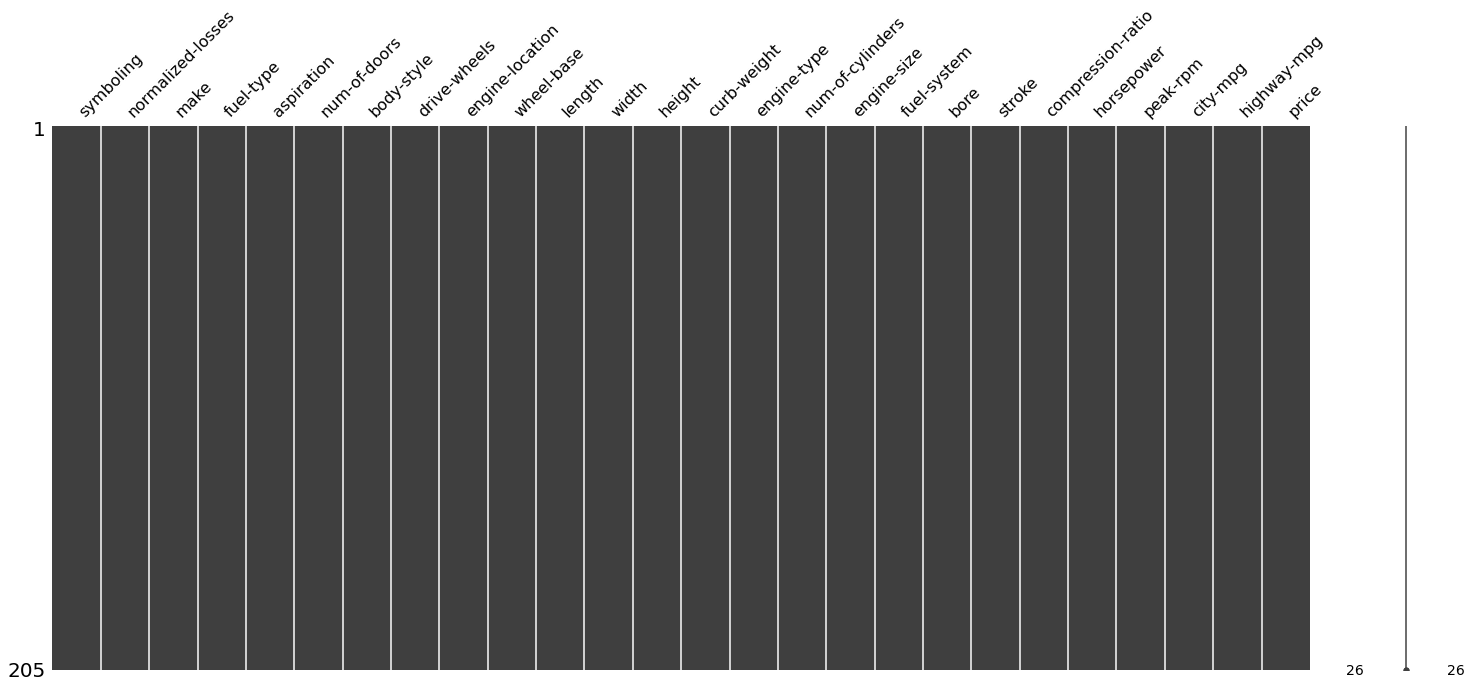

In [5]:
missingno.matrix(df)

In [6]:
df.shape

(205, 26)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
df["price"].replace({"?": "0"}, inplace=True)

In [10]:
df['price'] = pd.to_numeric(df['price'])

In [11]:
df.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().any().sum()

0

In [13]:
df.isnull().all().sum()

0

In [14]:
df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606,-0.071461
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082,0.578804
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662,0.685019
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218,0.695654
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358,0.158436
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465,0.799773
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470,0.838097
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201,0.077959
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337,-0.660026
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000,-0.687675


In [15]:
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel-system, dtype: int64

In [16]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
jaguar            3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64

In [17]:
engine_location=df['engine-location'].value_counts()

In [18]:
# the 
df[df['engine-location'] == 'front'].describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,202.0,0.801980,1.225921,-2.0,0.000,1.0,2.00,3.0
wheel-base,202.0,98.894059,5.958619,86.6,94.500,97.0,102.40,120.9
length,202.0,174.125743,12.412850,141.1,166.300,173.2,183.40,208.1
width,202.0,65.921287,2.158264,60.3,64.025,65.5,66.90,72.3
height,202.0,53.756436,2.447759,47.8,52.000,54.1,55.50,59.8
curb-weight,202.0,2552.371287,523.876904,1488.0,2145.000,2412.0,2947.75,4066.0
engine-size,202.0,125.910891,41.131653,61.0,97.000,115.0,141.00,326.0
compression-ratio,202.0,10.152079,4.000791,7.0,8.525,9.0,9.40,23.0
city-mpg,202.0,25.341584,6.512686,13.0,19.000,24.5,30.00,49.0
highway-mpg,202.0,30.836634,6.901442,16.0,25.000,30.0,35.50,54.0


In [19]:
df[df['engine-location'] == 'rear'].describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,3.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
wheel-base,3.0,89.500000,0.000000,89.5,89.5,89.5,89.5,89.5
length,3.0,168.900000,0.000000,168.9,168.9,168.9,168.9,168.9
width,3.0,65.000000,0.000000,65.0,65.0,65.0,65.0,65.0
height,3.0,51.600000,0.000000,51.6,51.6,51.6,51.6,51.6
curb-weight,3.0,2770.666667,25.403412,2756.0,2756.0,2756.0,2778.0,2800.0
engine-size,3.0,194.000000,0.000000,194.0,194.0,194.0,194.0,194.0
compression-ratio,3.0,9.500000,0.000000,9.5,9.5,9.5,9.5,9.5
city-mpg,3.0,17.000000,0.000000,17.0,17.0,17.0,17.0,17.0
highway-mpg,3.0,25.000000,0.000000,25.0,25.0,25.0,25.0,25.0


In [20]:
df['price']

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int64

In [21]:
df['city-mpg'].unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33], dtype=int64)

In [22]:
df['highway-mpg'].unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46], dtype=int64)

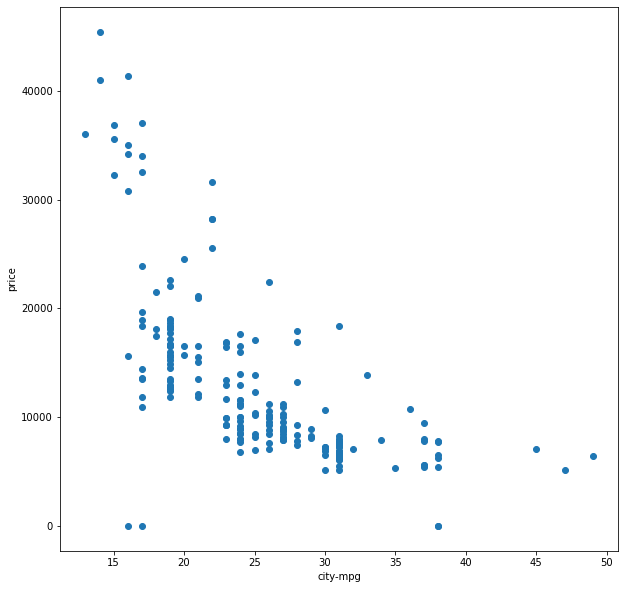

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(df['city-mpg'],df['price'])
plt.xlabel('city-mpg')
plt.ylabel('price')
plt.show()

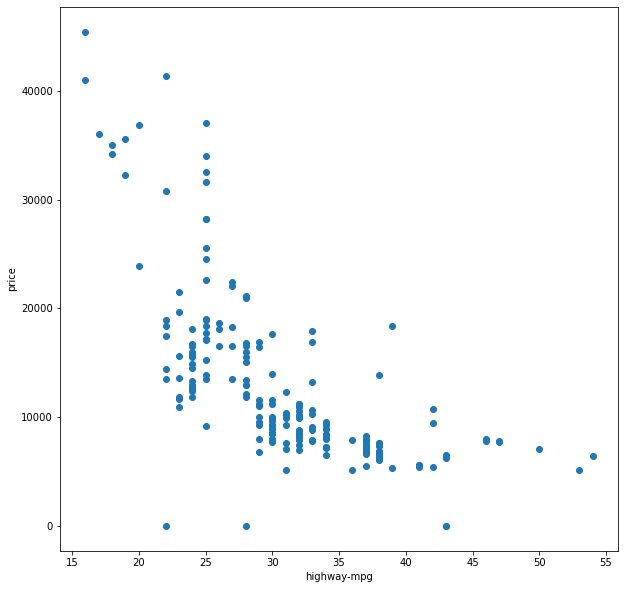

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(df['highway-mpg'],df['price'])
plt.xlabel('highway-mpg')
plt.ylabel('price')
plt.show()

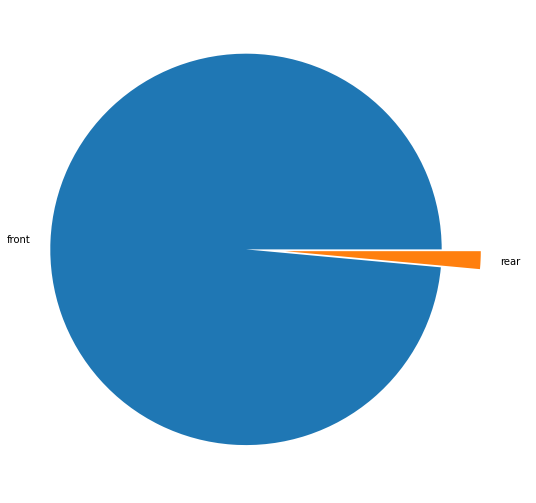

In [25]:
plt.figure(figsize=(9,9))
myexplode = [0.2,0]
plt.pie(x = engine_location, labels = engine_location.index, explode=myexplode)
plt.show()

In [26]:
int_cols=['symboling','wheel-base','length','width','height','curb-weight','engine-size','compression-ratio',
          'city-mpg','highway-mpg','price']

In [27]:
categorical_cols=['normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location'
                  ,'wheel-base','engine-type','num-of-cylinders','fuel-system','bore','stroke','horsepower','peak-rpm']

KeyError: 'i'

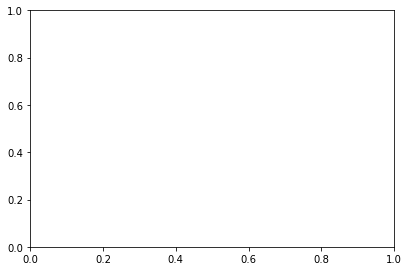

In [34]:
count=1
plt.figure(figsize=(30,20))
for i in categorical_cols:
    ax=plt.subplot(4,4,count)
    sns.distplot(df['i'])
    count += 1

In [30]:
sns.histplot(df['price'])

AttributeError: module 'seaborn' has no attribute 'histplot'